In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [ ]:
# Loading the datasets
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

# Combining datasets
df = pd.concat([train_df, test_df])
print(df.head())  # Display the first few rows of the dataset


   Unnamed: 0 trans_date_trans_time        cc_num  \
0           0   2019-01-01 00:00:18  2.703186e+15   
1           1   2019-01-01 00:00:44  6.304233e+11   
2           2   2019-01-01 00:00:51  3.885949e+13   
3           3   2019-01-01 00:01:16  3.534094e+15   
4           4   2019-01-01 00:03:06  3.755342e+14   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sa

In [ ]:
# Checking column names
print(df.columns)
# Inspecting the first few rows of the dataset
print(df.head())



Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
   Unnamed: 0 trans_date_trans_time        cc_num  \
0           0   2019-01-01 00:00:18  2.703186e+15   
1           1   2019-01-01 00:00:44  6.304233e+11   
2           2   2019-01-01 00:00:51  3.885949e+13   
3           3   2019-01-01 00:01:16  3.534094e+15   
4           4   2019-01-01 00:03:06  3.755342e+14   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4       

In [ ]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)


In [ ]:
# Check for duplicate values in the 'is_fraud' column
duplicates = df[df.duplicated(['is_fraud'])]
print("Duplicate rows based on 'is_fraud':\n", duplicates)


Duplicate rows based on 'is_fraud':
         Unnamed: 0 trans_date_trans_time        cc_num  \
1                1   2019-01-01 00:00:44  6.304233e+11   
2                2   2019-01-01 00:00:51  3.885949e+13   
3                3   2019-01-01 00:01:16  3.534094e+15   
4                4   2019-01-01 00:03:06  3.755342e+14   
5                5   2019-01-01 00:04:08  4.767265e+15   
...            ...                   ...           ...   
128195      128195   2020-08-04 16:58:40  3.512365e+15   
128196      128196   2020-08-04 16:59:41  3.531130e+15   
128197      128197   2020-08-04 17:00:14  3.547560e+15   
128198      128198   2020-08-04 17:00:23  4.981133e+12   
128199      128199          2020-08-04 1           NaN   

                                    merchant       category     amt  \
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_tra

In [ ]:
# Convert 'is_fraud' to a categorical type if it's not already
df['is_fraud'] = df['is_fraud'].astype('category')


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

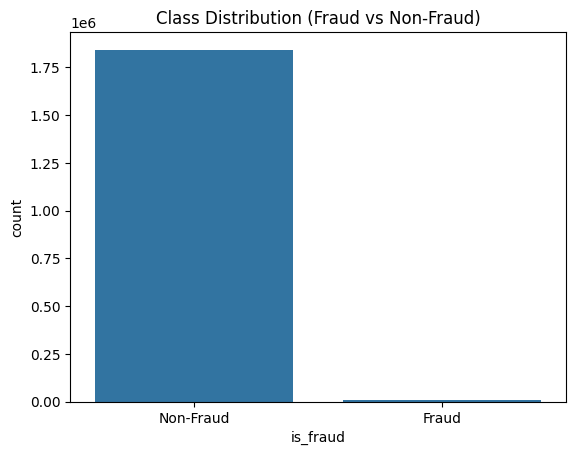

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the datasets
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

# Combine datasets
df = pd.concat([train_df, test_df])
print(df.head())  # Display the first few rows of the dataset

# Check column names
print(df.columns)
# Inspect the first few rows of the dataset
print(df.head())

# Check for duplicates
df.drop_duplicates(inplace=True)

# Ensure 'is_fraud' column is categorical
df['is_fraud'] = df['is_fraud'].astype('category')

# Check for class imbalance
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


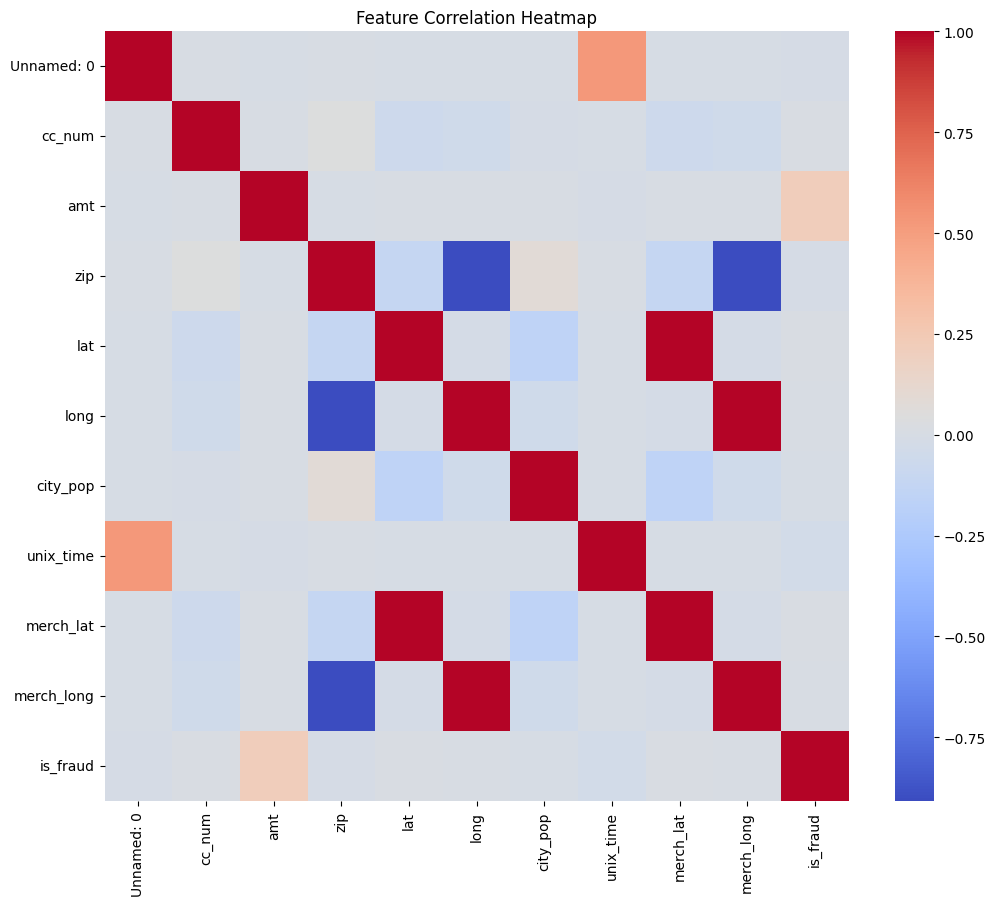

In [ ]:
# Drop the non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Feature correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
# Separate the features and the target
X = df_numeric.drop('is_fraud', axis=1)
y = df_numeric['is_fraud']


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Impute missing values in y_train with the most frequent value
# You can choose other imputation strategies based on the nature of your data
y_train = y_train.fillna(y_train.mode()[0])

# Alternatively, remove rows with missing target values:
# train_df = train_df.dropna(subset=['is_fraud'])

# Retrain the model after handling missing values
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Impute missing values in y_test with the most frequent value
y_test = y_test.fillna(y_test.mode()[0])

# Now, evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34797
         1.0       0.93      0.56      0.70       187

    accuracy                           1.00     34984
   macro avg       0.96      0.78      0.85     34984
weighted avg       1.00      1.00      1.00     34984

AUC-ROC: 0.9900676021766582


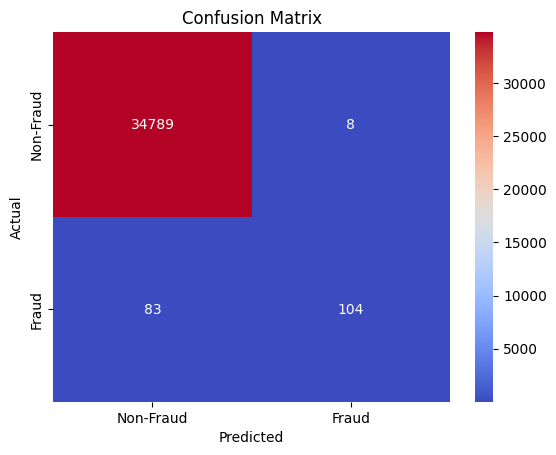

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


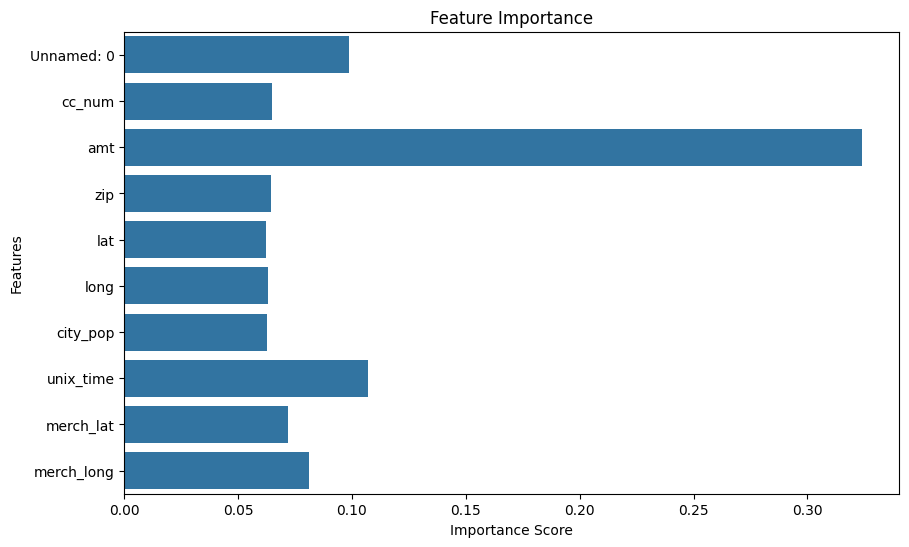

In [ ]:
# Feature Importance
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
